In [1]:
import pandas as pd
import numpy as np
from pandas_datareader import data
import pandas_datareader as pdr

%matplotlib inline
import matplotlib.pyplot as plt

import math

#Baidu = pdr.get_data_yahoo('BIDU',start='1/1/2015')
#Baidu.to_csv('Baidu.csv')
Baidu = pd.read_csv('Baidu.csv',index_col='Date')
Baidu.index = pd.to_datetime(Baidu.index)

#Jingdong = pdr.get_data_yahoo('JD',start ='1/1/2015')
#Jingdong.to_csv('Jingdong.csv')
Jingdong = pd.read_csv('Jingdong.csv',index_col='Date')
Jingdong.index = pd.to_datetime(Jingdong.index)

#Wangyi = pdr.get_data_yahoo('NTES',start = '1/1/2015')
#Wangyi.to_csv('Wangyi.csv')
Wangyi = pd.read_csv('Wangyi.csv',index_col='Date')
Wangyi.index = pd.to_datetime(Wangyi.index)

#Ali = pdr.get_data_yahoo('BABA',start = '1/1/2015')
#Ali.to_csv('Ali.csv')
Ali = pd.read_csv('Ali.csv',index_col='Date')
Ali.index = pd.to_datetime(Ali.index)

#Weibo = pdr.get_data_yahoo('WB',start = '1/1/2015')
#Weibo.to_csv('Weibo.csv')
Weibo = pd.read_csv('Weibo.csv',index_col='Date')
Weibo.index = pd.to_datetime(Weibo.index)


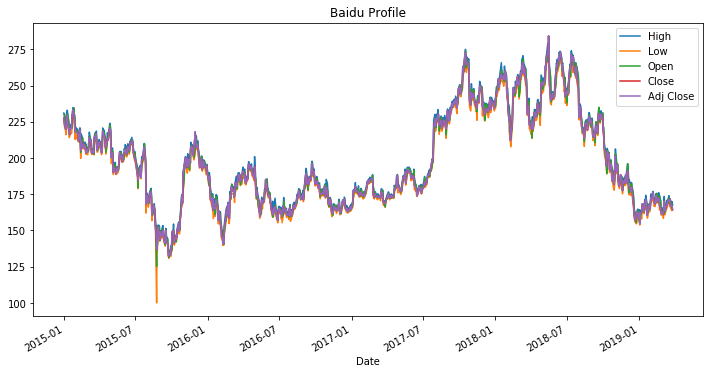

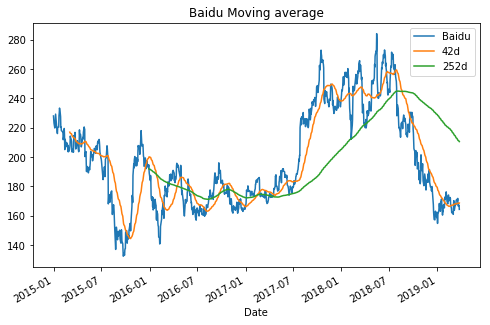

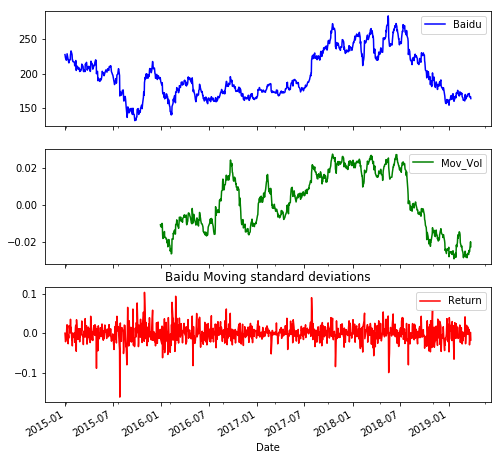

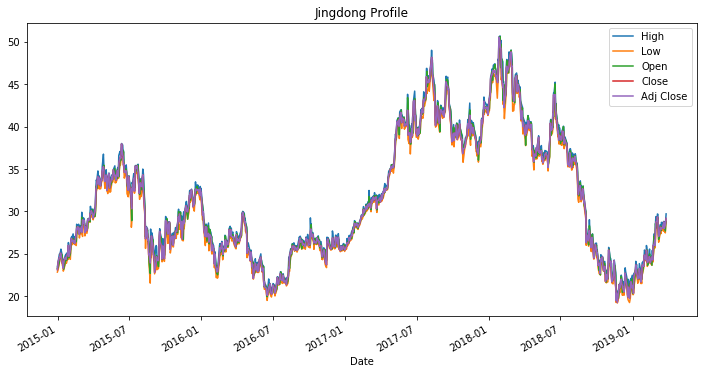

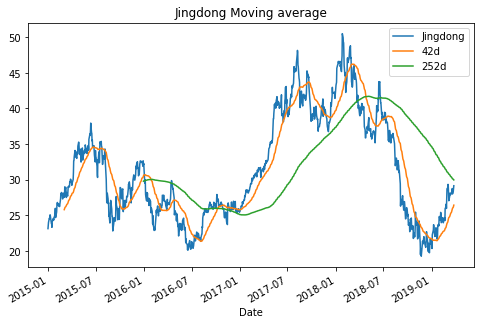

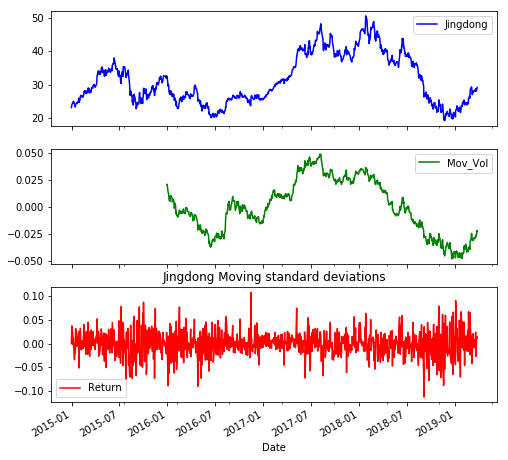

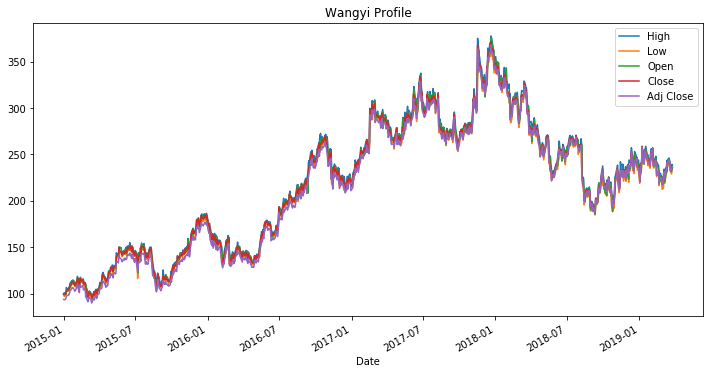

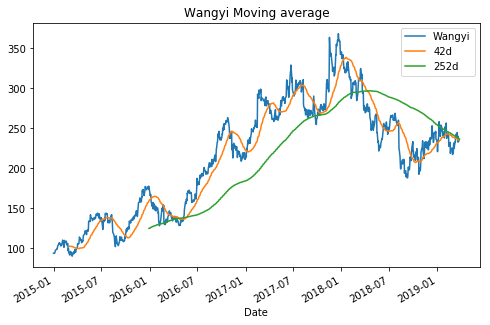

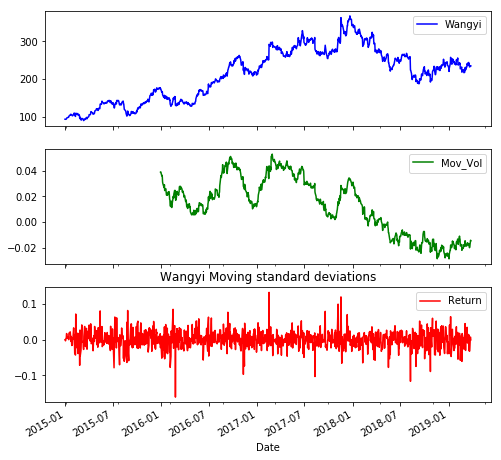

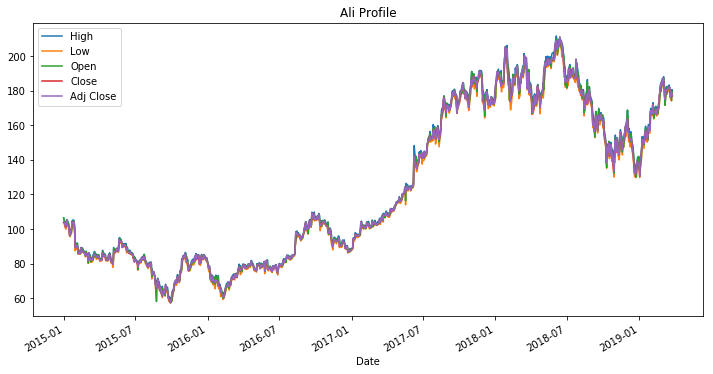

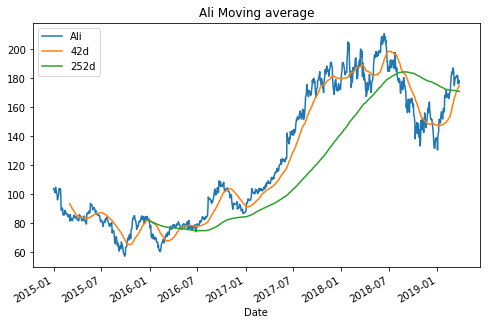

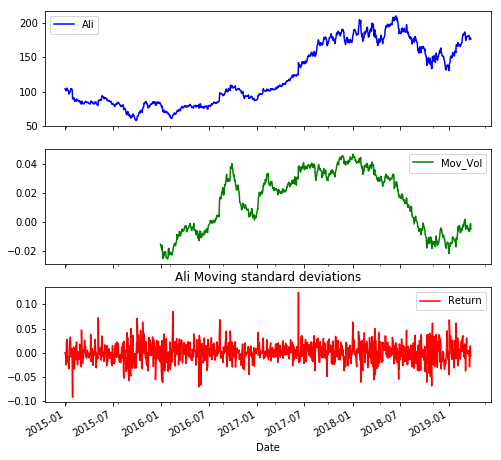

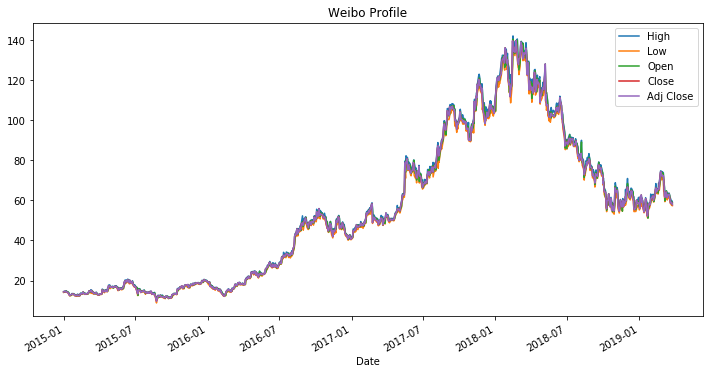

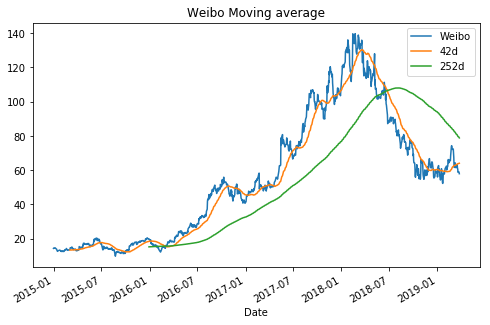

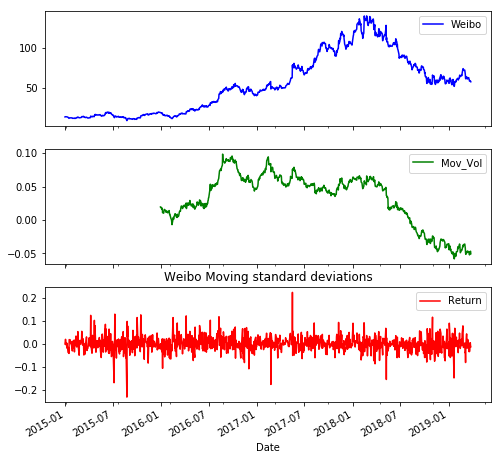

In [3]:
internet_list = [Baidu,Jingdong,Wangyi,Ali,Weibo]
internet_name = ['Baidu','Jingdong','Wangyi','Ali','Weibo']
for j in  range (5):
    #概览股价
    plt.rc('figure',figsize=(12,6))  
    internet_list[j][['High','Low','Open','Close','Adj Close']].plot.line()
    plt.title(internet_name[j]+' Profile')
    #plt.savefig(internet_name[j]+"Basic Chart.png")
    
    #波动率变化
    df = pd.DataFrame(internet_list[j]['Adj Close'])
    df.columns = [internet_name[j]]
    df['Return'] = 0.0
    for i in range(1,len(df)):
        df['Return'][i] = np.log(df[internet_name[j]][i] / df[internet_name[j]][i-1])
    
    #移动平均值
    df['42d'] = df[internet_name[j]].rolling(window=42,center=False).mean()
    df['252d'] = df[internet_name[j]].rolling(window=252,center=False).mean()
    df[[internet_name[j],'42d','252d']].plot(figsize=(8,5))
    plt.title(internet_name[j]+' Moving average')
    #plt.savefig(internet_name[j]+"Moving average.png")
    
    #移动历时标准差
    df['Mov_Vol'] = df['Return'].rolling(window=252,center=False).mean() * math.sqrt(252)
    df[[internet_name[j],'Mov_Vol','Return']].plot(subplots=True,style=['b','g','r'],figsize=(8,8))
    plt.title(internet_name[j]+' Moving standard deviations')
    #plt.savefig(internet_name[j]+"Moving standard deviations")
    
    Internet_describe = internet_list[j].describe()
    Internet_describe.to_csv(internet_name[j]+" describe.csv")


In [4]:
AC = pd.DataFrame(Baidu['Adj Close'])
AC.columns = ['Baidu']
AC['Jingdong'] = Jingdong['Adj Close']
AC['Wangyi'] = Wangyi['Adj Close']
AC['Ali'] = Ali['Adj Close']
AC['Weibo'] = Weibo['Adj Close']
#AC.to_csv("Adj collect.csv")

In [7]:
ACC = AC.corr()
ACC.to_csv("Adj corr.csv")
AC.corr()

,Baidu,Jingdong,Wangyi,Ali,Weibo
Baidu,1.000000,0.711299,0.397340,0.708614,0.679482
Jingdong,0.711299,1.000000,0.592681,0.600421,0.693523
Wangyi,0.397340,0.592681,1.000000,0.753546,0.866427
Ali,0.708614,0.600421,0.753546,1.000000,0.925171
Weibo,0.679482,0.693523,0.866427,0.925171,1.000000


In [9]:
ACD = AC.describe()
ACD.to_csv("Adj describe.csv")
AC.describe()

,Baidu,Jingdong,Wangyi,Ali,Weibo
count,1066.000000,1066.000000,1066.000000,1066.000000,1066.000000
mean,197.778134,31.377129,213.051230,123.482786,54.930141
std,32.732619,7.293178,69.103503,44.780980,36.121347
min,132.369995,19.270000,89.813492,57.389999,9.670000
25%,172.442501,25.642499,142.480057,83.105000,18.182500
50%,189.049995,29.040000,224.753906,104.209999,50.869999
75%,223.415005,37.507501,266.396271,171.272499,78.302498
max,284.070007,50.500000,367.980591,210.860001,139.740005


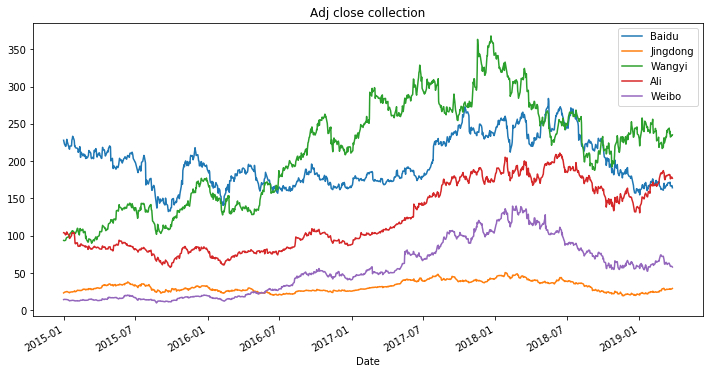

In [10]:
plt.rc('figure',figsize=(12,6))
AC[['Baidu','Jingdong','Wangyi','Ali','Weibo']].plot.line()
plt.title("Adj close collection")
plt.savefig("Adj close collection")